In [ ]:
# install the necessary __package__

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.preprocessing import StandardScaler
import plotly.express as px
#warnings
import warnings
warnings.simplefilter(action='ignore')

In [13]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [14]:
#Load data
from sklearn import datasets
iris = pd.read_csv("iris.csv")

x = iris.iloc[:, [0, 1, 2, 3]].values

In [15]:
iris.head().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.400000,0.200000,setosa
1,4.900000,3.000000,1.400000,0.200000,setosa
2,4.700000,3.200000,1.300000,0.200000,setosa
3,4.600000,3.100000,1.500000,0.200000,setosa
4,5.000000,3.600000,1.400000,0.200000,setosa


In [16]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
# checking the simple statistical parameters 

iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [18]:
X = iris.iloc[:,:-1].values #Set our training data

y = iris.iloc[:,-1].values #We'll use this just for visualization as clustering doesn't require labels

In [19]:
# checking the number of rows and columns in train dataset
rows,col=x.shape
print ('Row:' , rows,'\nColumns:',col)

Row: 150 
Columns: 4


In [20]:
#number of null values 
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [21]:
#To check number of uniqe elements in each columns.
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [22]:
fig = px.scatter(data_frame=iris, x='sepal_length',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [23]:
fig = px.scatter(data_frame=iris, x='sepal_width',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [24]:
fig = px.scatter(data_frame=iris, x='petal_length',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='petallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [25]:
fig = px.scatter(data_frame=iris, x='petal_width',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='petalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [26]:
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}

In [27]:
scaler= StandardScaler()
scaled_features= scaler.fit_transform(x)

In [28]:
List=[]
for k in range(1,20):
    kmeans= KMeans(n_clusters=k, **kmeans_set) #** open dictionry
    kmeans.fit(scaled_features)
    List.append(kmeans.inertia_) 

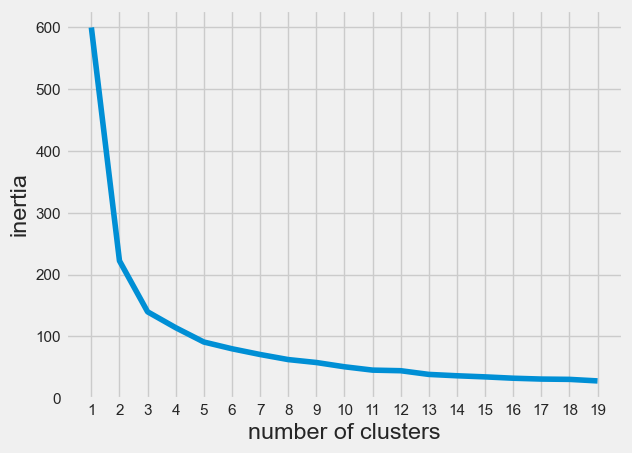

In [30]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,20),List)
plt.xticks(range(1,20))
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [32]:
!pip install kneed

In [33]:
from kneed import KneeLocator
k1=KneeLocator(range(1,20),List , curve='convex', direction= 'decreasing')
k1.elbow

3

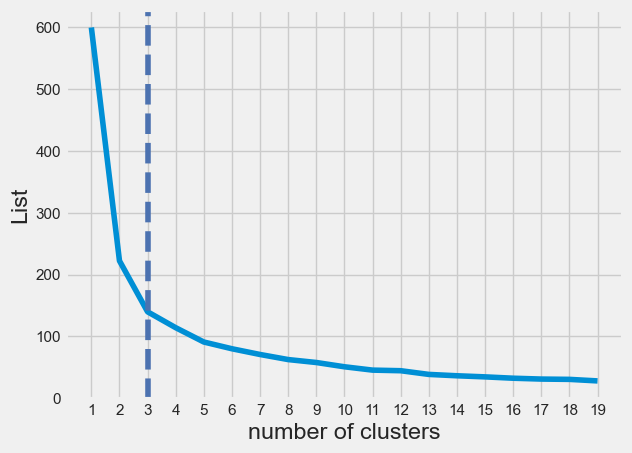

In [35]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,20),List)
plt.xticks(range(1,20))
plt.xlabel('number of clusters')
plt.ylabel('List')
plt.axvline(x=k1.elbow, color='b', label= 'axvline-full height', ls= '--')
plt.show()

In [36]:
silhouette_coefficients =[]
for k in range(2,20):#1 is the worse
    kmeans=KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_features)
    score= silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

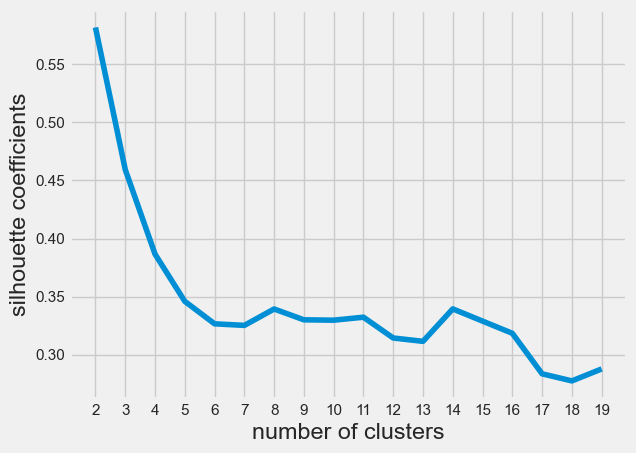

In [37]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,20),silhouette_coefficients)
plt.xticks(range(2,20))
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficients')
plt.show()

In [38]:
kmeans= KMeans(n_clusters=3, **kmeans_set)
y_kmeans= kmeans.fit_predict(x)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


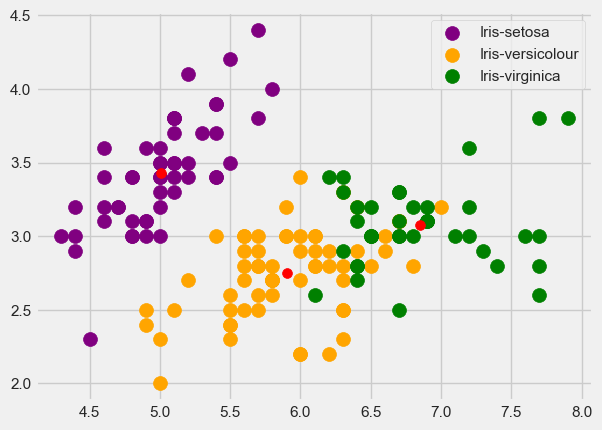

In [39]:
centroids= kmeans.cluster_centers_
print(centroids)
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#plotting the centroid of the clusters
plt.scatter(centroids[:,0], centroids[:,1],c='red', s=50)
plt.legend()
plt.show()

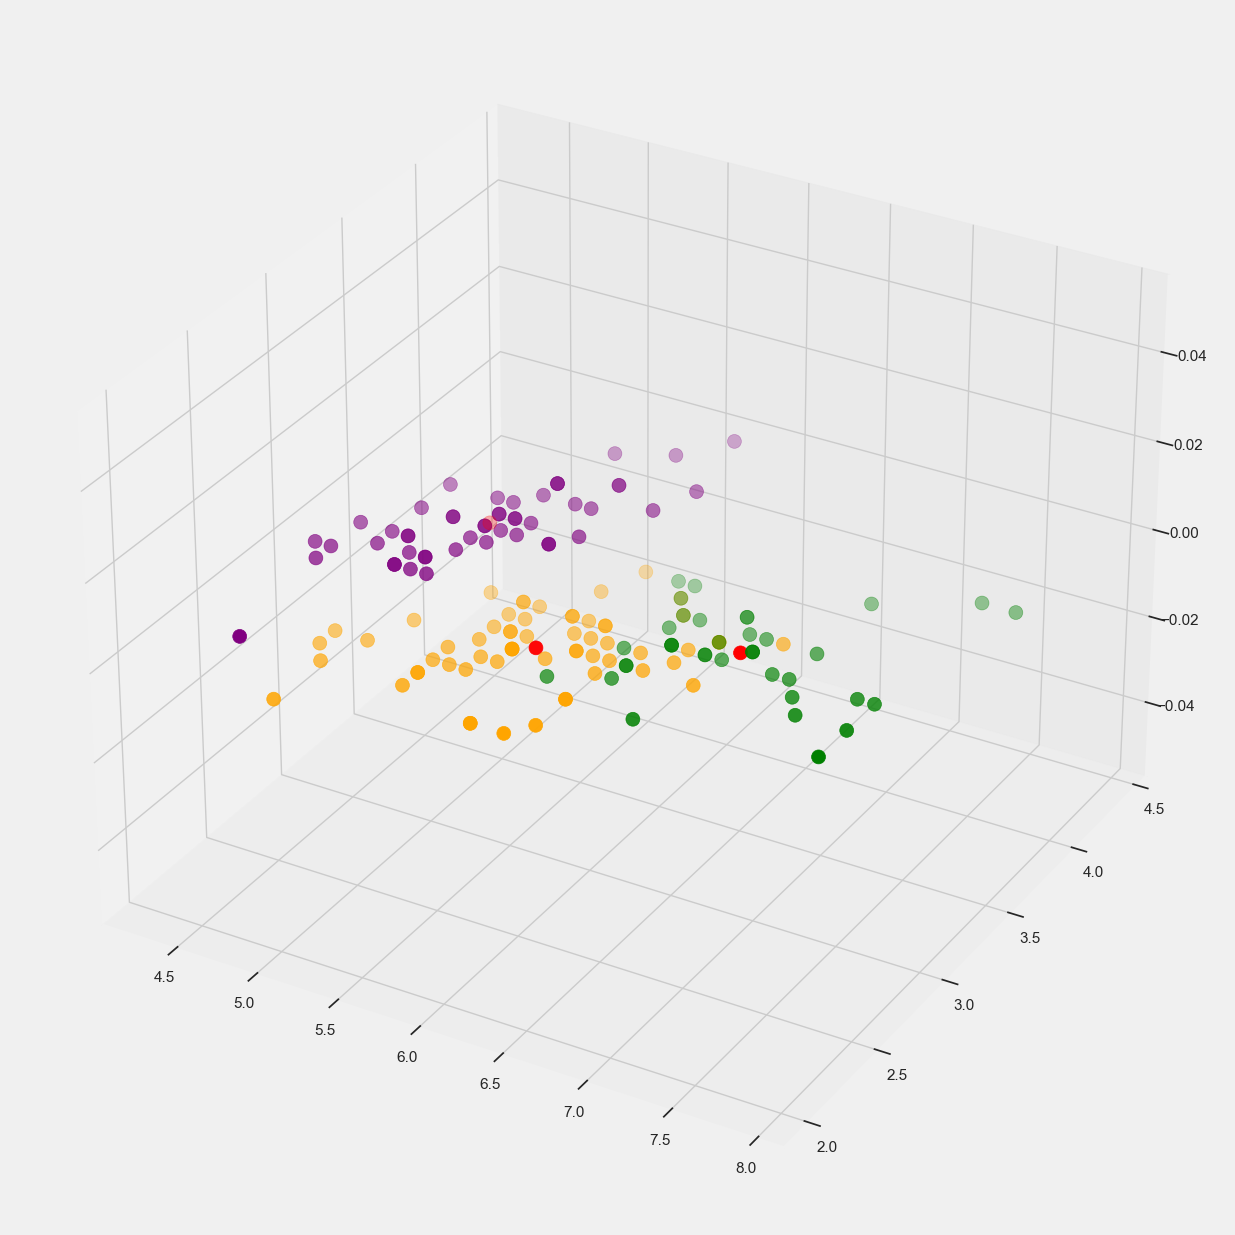

In [40]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [41]:
kmeans= KMeans(n_clusters=3, **kmeans_set).fit(x)
cluster=kmeans.labels_
cluster  #our tag values are between 0-2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [42]:
#let's divide our data into groups
iris["cluster_no"]=cluster
iris.head(12)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_no
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


In [43]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_no
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,1


In [44]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1],
    mode='markers',marker_color='#DB4CB2',name='Iris-setosa'
))

fig.add_trace(go.Scatter(
    x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1],
    mode='markers',marker_color='#c9e9f6',name='Iris-versicolour'
))

fig.add_trace(go.Scatter(
    x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1],
    mode='markers',marker_color='#7D3AC1',name='Iris-virginica'
))

fig.add_trace(go.Scatter(
    x=centroids[:, 0], y=centroids[:,1],
    mode='markers',marker_color='#CAC9CD',marker_symbol=4,marker_size=13,name='Centroids'
))
fig.update_layout(template='plotly_dark',width=1000, height=500,)

In [45]:
import scipy.cluster.hierarchy as sch

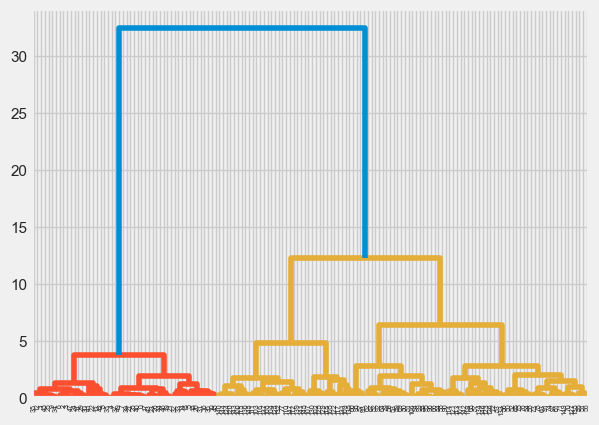

In [46]:
dendogram=sch.dendrogram(sch.linkage(x,method="ward"))
plt.show()

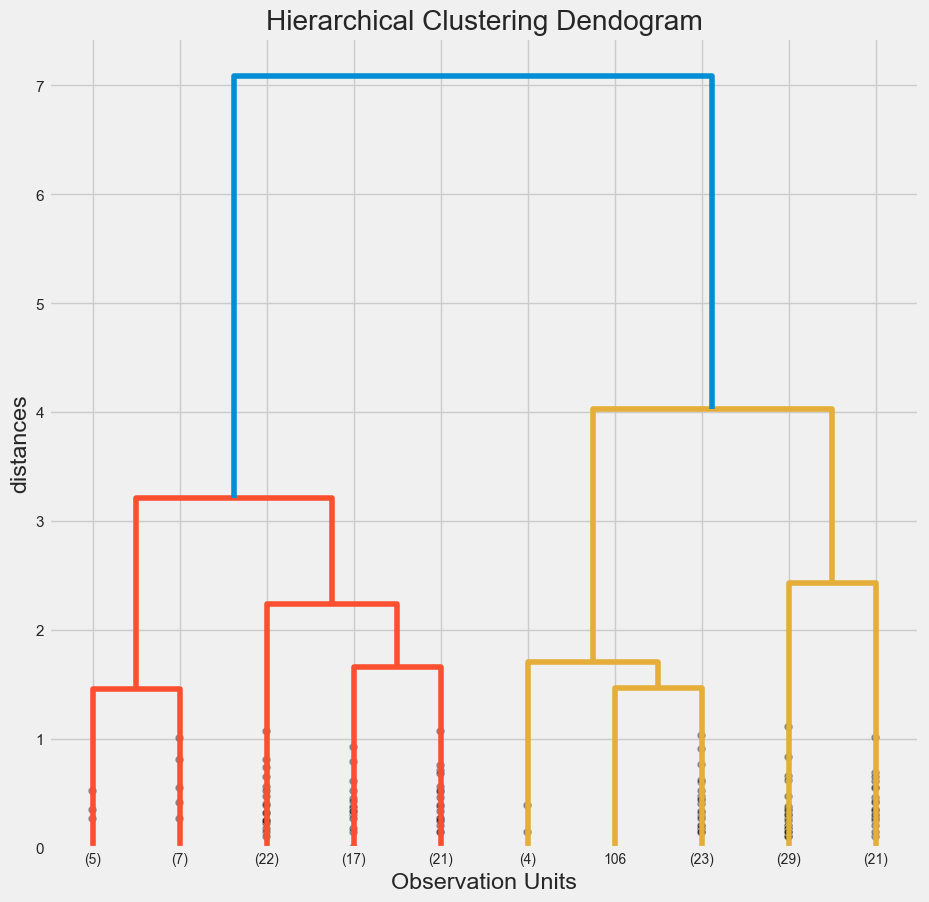

In [47]:
plt.figure(figsize=(10,10)) 
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Observation Units")
plt.ylabel("distances")
dendrogram(linkage(x,"complete"),
          leaf_font_size=10,
          truncate_mode="lastp",
           p=10,
           show_contracted=True)
plt.show()